<a href="https://colab.research.google.com/github/JosegSuarezb/Integracion-de-los-datos/blob/main/Parcial_2__Jose__Gregorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

De acuerdo con la base de datos Perdida de Productividad en Cultivos de Palma, llevar a cabo el siguiente procedimiento:

Para la base de Datos Observados, llevar a cabo un proceso de gestión de las pérdidas para cuatro (4) niveles de gestión, de acuerdo con la matriz de impacto definida en el curso: 1:1,1:2,1:3,1:4. Es importante para las distribuciones de pérdida que arrojan estas gestiones, hacer una análisis de las variables de los diferentes indicadores que arroja función describe(), así como el coeficiente de asimetría, y el Opeartional Value at Risk (OpVar) o pérdida extrema. Es importante mencionar, que estos indicadores muestran la prospectiva del riesgo frente a la implementación de diferentes matrices de gestión, con el fin de mitigar las pérdidas asociadas con las operaciones agrícolas.
Tomando como base de referencia los Datos Observados, llevar a cabo la integración de los datos para cada una de las cuatro (4) fincas que posee la base de datos (Finca 1, Finca 2, Finca 3, Finca 4). Para esta integración se sugiere un nivel de integración del 99%. Es importante analizar los datos y las variaciones para las métricas que arroja función describe() en python. Es importante analizar igualmente, las variaciones experimentadas por los coeficientes de Asimetría y el OpVar para antes y despues de la integración de los datos.

#Cargamos librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Carga base de datos

In [ ]:
nxl='/content/drive/MyDrive/Integracion de datos (enfasis)/3. Perdida Productividad_Zonas(I).xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=np.array(XDB[['Fecuencia ', 'Severidad']])

#Gestion de perdida datos observado

In [ ]:
from sklearn.cluster import KMeans

# Clusterización
def clusterizacion(XDB,x):
  NC=5 #Número de cualidades por variable lingüísticas

  mkm=KMeans(n_clusters=NC,init='random',random_state=42)
  mkm.fit(XDB[:,x].reshape(-1,1))
  XC=mkm.cluster_centers_
  XC=np.array(sorted(XC))
  print("Los clusters son:\n",XC.T)

  sigma=np.zeros((NC,1)) # Valor de pertenencia

  for j in range(NC):
    sigma[j,]=np.sum(np.abs(XC-XC[j]))/4

  return XC, sigma

In [ ]:
# Clusterización por los eventos  (Frecuencia)
mkmf = clusterizacion(XDB,0)
lbf=['Muy Pocos','Pocos','Más o Menos','Muchos','Bastantes'] #Label clusters
sigmaf = mkmf[1]
XCf = mkmf[0]

print("La base de los conjuntos es:\n",sigmaf.T)

Los clusters son:
 [[10.84       31.95744681 48.69387755 69.15555556 90.02272727]]
La base de los conjuntos es:
 [[49.1174018  33.27931669 29.095209   34.21062851 49.86100729]]


In [ ]:
# Clusterización por Severidad
mkmf = clusterizacion(XDB,1)
lbs=['Muy Bajo','Bajo','Medio','Alto','Muy Alto'] #Label clusters
sigmas = mkmf[1]
XCs = mkmf[0]

print("La base de los conjuntos de severidad son:\n",sigmas.T)

Los clusters son:
 [[-218364.1021269   -82368.50392072   30318.32838028  101895.40697602
   210153.64372096]]
La base de los conjuntos de severidad son:
 [[283363.82091604 181367.1222614  153195.41418615 171089.68383508
  252283.36139379]]


#Matriz de perdidas

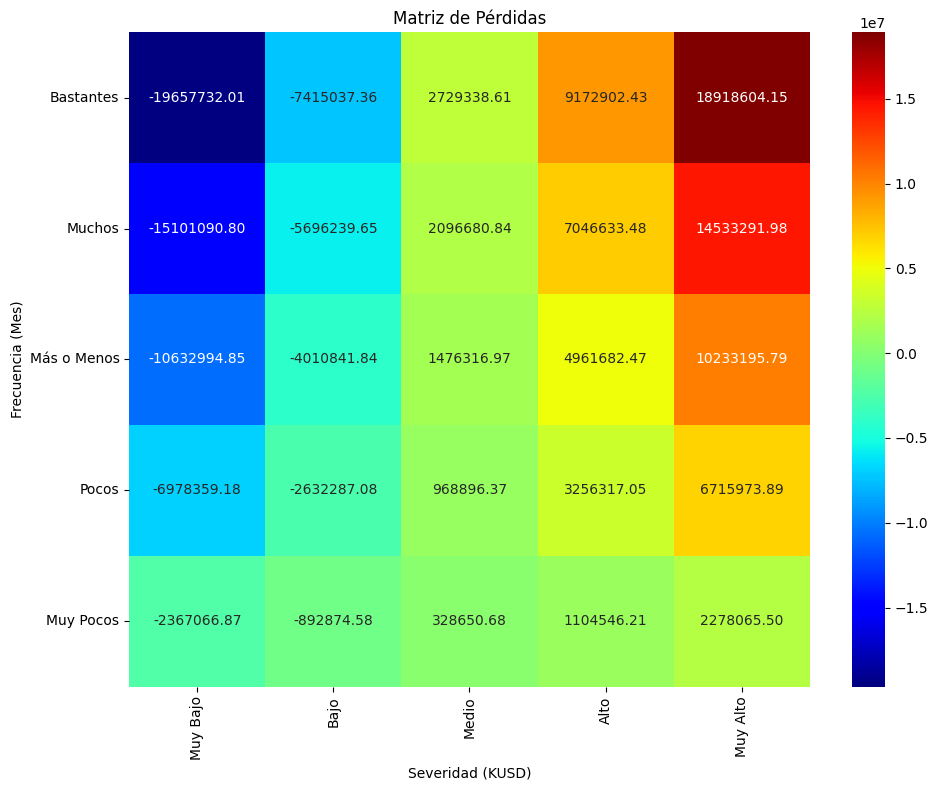

In [ ]:
#3. Se procede con la obtención del mapa de pérdidas - Matriz de Pérdidas
MP = np.outer(XCf, XCs)

# Invertir el orden de las filas para que las frecuencias altas estén arriba
MP_ordenada = MP[::-1, :]  # Inversión vertical

# Reorganizar también las etiquetas de frecuencia en el mismo orden
lbf_ordenada = lbf[::-1]

# Graficar la matriz de pérdidas
plt.figure(figsize=(10, 8))
sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f')
plt.title('Matriz de Pérdidas')
plt.ylabel('Frecuencia (Mes)')
plt.xlabel('Severidad (KUSD)')
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
def gestion(x):
  dff=pd.DataFrame(XDB[:,0])
  dfs=pd.DataFrame(XDB[:,1])

  Xf=np.array(dff.sample(n=1000, replace = True))
  Xs=np.array(dfs.sample(n=1000, replace = True))

  MI=np.array([[1,1,1,2,2],
             [1,2,2,3,3],
             [1,2,3,3,4],
             [2,3,3,4,4],
             [2,3,4,4,5]])
  #Matriz de Gestión
  NG= x
  MG=MI.astype(float).copy()
  MG[(MG > 1) & (MG < 5)] *= NG #Yo solamente gestiono riesgo a partir del nivel 3 (Mucho Apetito al Riesgo)
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
  # Primer heatmap
  sns.heatmap(MI, annot=True, cmap='jet', fmt='.2f', ax=axes[0])
  axes[0].set_title('Matriz de impacto')
  axes[0].set_ylabel('Frecuencia (Mes)')
  axes[0].set_xlabel('Severidad (KUSD)')
  axes[0].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
  axes[0].set_yticklabels(lbf_ordenada)
  axes[0].set_xticks(np.arange(len(lbs)) + 0.5)
  axes[0].set_xticklabels(lbs, rotation=90)

  # Segundo heatmap
  sns.heatmap(MG, annot=True, cmap='jet', fmt='.2f', ax=axes[1])
  axes[1].set_title('Matriz de gestion')
  axes[1].set_ylabel('Frecuencia (Mes)')
  axes[1].set_xlabel('Severidad (KUSD)')
  axes[1].set_yticks(np.arange(len(lbf_ordenada)) + 0.5)
  axes[1].set_yticklabels(lbf_ordenada)
  axes[1].set_xticks(np.arange(len(lbs)) + 0.5)
  axes[1].set_xticklabels(lbs, rotation=90)

  plt.tight_layout()
  plt.show()

  #Se procede con la construcción de la distribución agregada
  LDAo=np.array(Xf*Xs)
  LDAm=np.zeros((len(LDAo)))

  #Se procede con la estimacion de las pérdidas utilizando el modelo borroso
  for k in range(len(LDAo)):
    #print(Xf[k,],Xs[k,])
    VPf=np.exp(-0.5*((XCf-Xf[k,])/sigmaf)**2)
    VPs=np.exp(-0.5*((XCs-Xs[k,])/sigmas)**2)
    MB=np.outer(VPf, VPs);MB=np.outer(VPf, VPs)

    #Se procede a determinar los mayores valores de pértenencia
    VMB=np.array(sorted(MB.flatten(),reverse=True))
    MT=np.zeros((5,5))

    for i in range(4):
      MT[np.where(MB==VMB[i])]=1

    LDAm[k,]=np.sum(MB*MP*MT*MI)/np.sum(MB*MT*MG)

  plt.figure()
  sns.kdeplot(x=LDAo.flatten(),fill=True,color='red',label='LDAo')
  sns.kdeplot(x=LDAm.flatten(),fill=True,color='green',label='LDAm')
  plt.legend()
  plt.grid()
  plt.show()

  return LDAo, LDAm

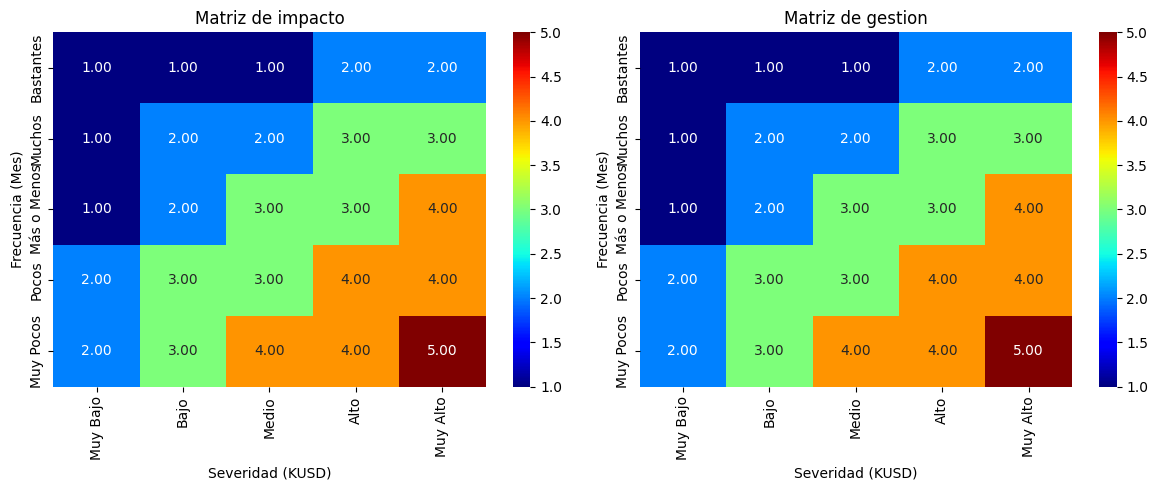

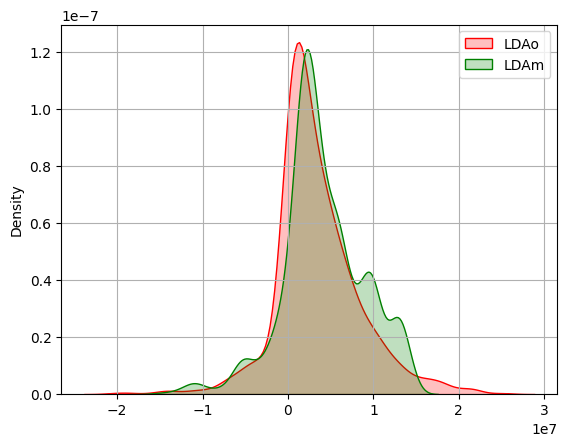

In [ ]:
LDAo1, LDAm1= gestion(1) #Gestion 1:1

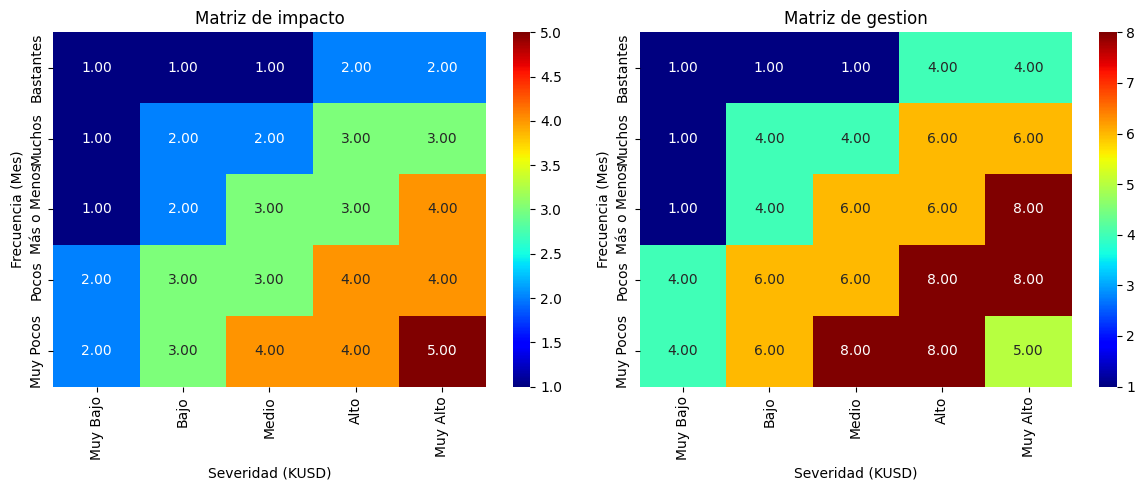

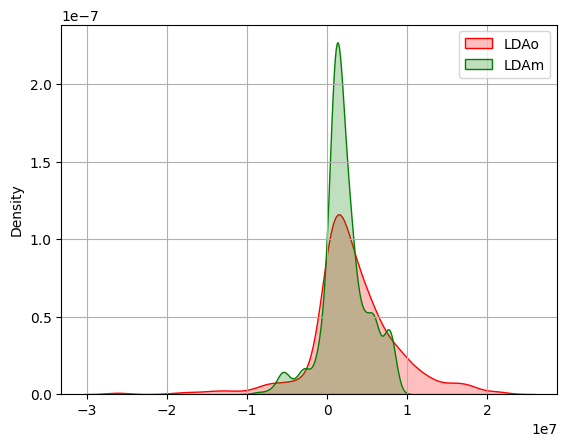

In [ ]:
LDAo2, LDAm2= gestion(2) #Gestion 1:2

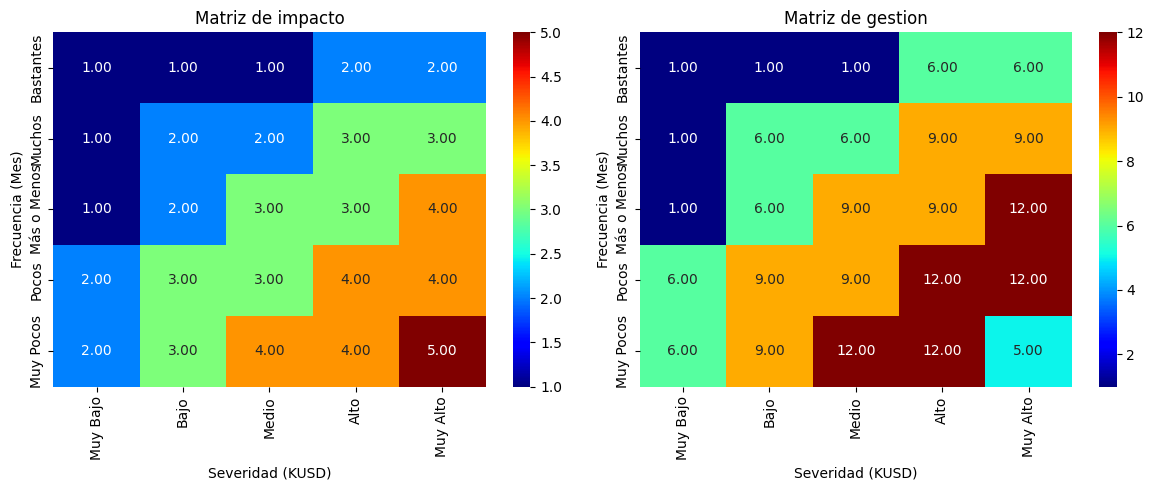

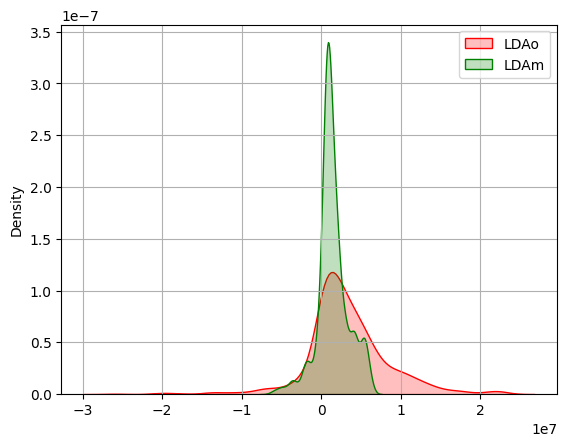

In [ ]:
LDAo3, LDAm3= gestion(3) #Gestion 1:3

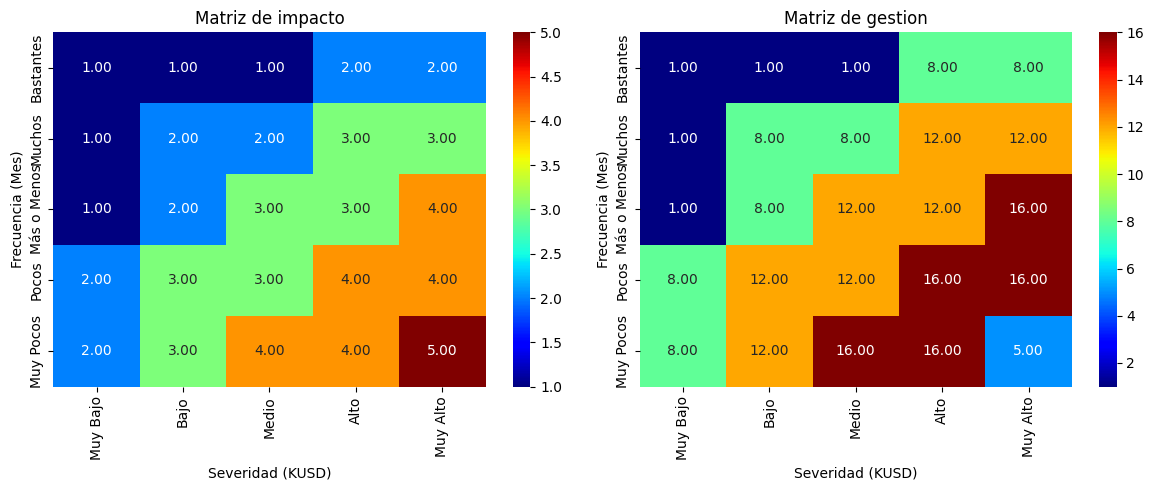

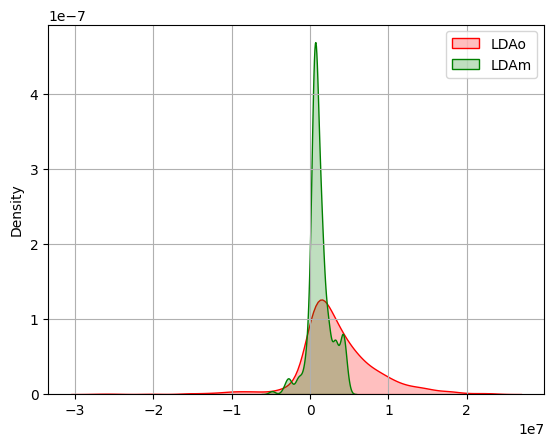

In [ ]:
LDAo4, LDAm4= gestion(4)

In [ ]:
def metrica(LDAo, LDAm):
    # Aplanar los datos
    LDAo_flat = LDAo.flatten()
    LDAm_flat = LDAm.flatten()

    # Función auxiliar para calcular indicadores
    def calcular_indicadores(data):
        desc = pd.Series(data).describe().to_dict()
        return {
            'Count': desc['count'],
            'Mean / Pérdidas Esperadas': desc['mean'],
            'Std': desc['std'],
            'Min': desc['min'],
            '25%': desc['25%'],
            '50%': desc['50%'],
            '75%': desc['75%'],
            'Max': desc['max'],
            'Asimetría': skew(data),
            'OpVar / Pérdidas Catastróficas': np.percentile(data, 99.9),
        }

    # Calcular indicadores para originales y gestionados
    ind_o = calcular_indicadores(LDAo_flat)
    ind_m = calcular_indicadores(LDAm_flat)

    # Calcular pérdidas no esperadas
    ind_o['Pérdidas No Esperadas'] = (ind_o['Mean / Pérdidas Esperadas'] + ind_o['OpVar / Pérdidas Catastróficas']) / 2
    ind_m['Pérdidas No Esperadas'] = (ind_m['Mean / Pérdidas Esperadas'] + ind_m['OpVar / Pérdidas Catastróficas']) / 2

    # Crear DataFrame comparativo
    df_metrica = pd.DataFrame({
        'Original': ind_o,
        'Gestionado': ind_m
    })

    return df_metrica

In [ ]:
metrica(LDAo1, LDAm1)

,Original,Gestionado
Count,1.000000e+03,1.000000e+03
Mean / Pérdidas Esperadas,3.389873e+06,4.005620e+06
Std,4.971795e+06,4.789460e+06
Min,-2.015284e+07,-1.490053e+07
25%,6.247158e+05,1.772782e+06
50%,2.476325e+06,3.386399e+06
75%,5.682661e+06,6.584446e+06
Max,2.513954e+07,1.397197e+07
Asimetría,4.561909e-01,-2.285597e-01
OpVar / Pérdidas Catastróficas,2.211941e+07,1.386785e+07


In [ ]:
#se propone la caracterizacion de las distribuciones
def caracterizacion(LDAm):
  m=np.array(pd.DataFrame(LDAm).describe())
  m=np.vstack((m, skew(LDAm)))
  m=np.vstack((m, np.percentile(LDAm, 99.9)))

  return m

In [ ]:
mo = caracterizacion(LDAo1)
mg1 = caracterizacion(LDAm1)
mg2 = caracterizacion(LDAm2)
mg3 = caracterizacion(LDAm3)
mg4 = caracterizacion(LDAm4)

#Tipogst =['Datos Observados','Gestión 1:1','Gestión 1:2','Gestión 1:3','Gestión 1:4']
dfe=pd.DataFrame(np.row_stack((mo.T, mg1.T,mg2.T,mg3.T,mg4.T)))
dfe.columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'asimetria', 'OpVar']
display(dfe)

,count,mean,std,min,25%,50%,75%,max,asimetria,OpVar
0,1000.0,3.389873e+06,4.971795e+06,-2.015284e+07,6.247158e+05,2.476325e+06,5.682661e+06,2.513954e+07,0.456191,2.211941e+07
1,1000.0,4.005620e+06,4.789460e+06,-1.490053e+07,1.772782e+06,3.386399e+06,6.584446e+06,1.397197e+07,-0.228560,1.386785e+07
2,1000.0,2.101805e+06,2.851536e+06,-8.699420e+06,9.477161e+05,1.764766e+06,3.297603e+06,8.386625e+06,-0.208273,8.359389e+06
3,1000.0,1.415206e+06,1.971319e+06,-6.240021e+06,6.425027e+05,1.154415e+06,2.176915e+06,6.191782e+06,-0.124427,6.153546e+06
4,1000.0,1.147141e+06,1.479581e+06,-5.127125e+06,4.939594e+05,8.830116e+05,1.634395e+06,4.836136e+06,-0.020658,4.776414e+06


#**Analisis de resultados**

Con base en los datos de perdida del cultivo de palma se realizaron las siguientes gestiones de riesgos para tener un proceso de gestion de perdidas y poder tener un respaldo a la hora de que hayan perdidas. Luego de que se realizo el estudio primero con los datos observados sin gestion se vio que fue el que mas OpVar o perdidas extremas tuvo, al igual fue el que mas asimetria tuvo lo que quiere decir que tiene una cola mas larga hacia la derecha como se evidencio en la grafica, lo que quiere decir es que tiene una alta probabilidad de que existan perdidas altas. Despues de realizar las gestiones se evidencio que el OpVar fue disminuyendo a lo largo de que aumentaba las gestiones al igual que la asimetria lo que quiere decir que cada vez que aumentaba las gestiones hubo un mayor control de las perdidas extremas y que de acuerdo con la asimetria fue que a lo ultimo tuvo una distribucion mas centrada y simetria teniendo en cuenta que estuvo mas cerca del 0 la asimetria.

#Integracion de cada finca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

def integrar_fincas(nxl_path, XLDA, XCf, sigmaf, XCs, sigmas):
    """
    Función para integrar múltiples fincas con la zona observada

    Parámetros:
    nxl_path: Ruta del archivo Excel con los datos
    XLDA: Datos de la zona observada (numpy array)
    XCf, sigmaf: Parámetros para frecuencia
    XCs, sigmas: Parámetros para severidad

    Retorna:
    Un diccionario con todos los resultados por finca
    """

    # Configuración inicial
    lbf = ['Muy Pocos','Pocos','Más o Menos','Muchos','Bastantes']
    lbs = ['Muy Bajo','Bajo','Medio','Alto','Muy Alto']

    resultados = {}

    for finca_num in range(1, 5):
        print(f"\n{'='*50}")
        print(f"PROCESANDO FINCA {finca_num}")
        print(f"{'='*50}")

        # Leer datos de la finca
        XDBe = pd.read_excel(nxl_path, sheet_name=finca_num)
        XDBe = np.array(XDBe[['Fecuencia ', 'Severidad']])

        Xfe = np.array(XDBe[:,0])
        Xse = np.array(XDBe[:,1])

        # Primer registro - Valores difusos
        print("\nValores difusos para frecuencia (primer registro):")
        VPf = np.exp(-0.5*((XCf-Xfe[0])/sigmaf)**2)
        dffe = pd.DataFrame((VPf.T))
        dffe.columns = lbf
        display(dffe)

        print("\nValores difusos para severidad (primer registro):")
        VPs = np.exp(-0.5*((XCs-Xse[0])/sigmas)**2)
        dfse = pd.DataFrame((VPs.T))
        dfse.columns = lbs
        display(dfse)

        # Proceso de integración
        LDAe = []
        m1 = 0

        for k in range(len(Xfe)):
            VPf = np.exp(-0.5*((XCf-Xfe[k])/sigmaf)**2)
            VPs = np.exp(-0.5*((XCs-Xse[k])/sigmas)**2)
            VPmax = np.max(VPf)*np.max(VPs)

            if VPmax > 0.99:
                m1 += 1
                LDAe.append(Xfe[k]*Xse[k])

        print(f'\nNúmero final de datos integrados: {m1}')

        # Preparar datos
        LDAe_array = np.array(LDAe).reshape(-1,1)
        LDAint = np.vstack((XLDA, LDAe_array))
        LDAe_full = Xfe * Xse

        # Gráficas
        plt.figure(figsize=(10, 6))
        sns.kdeplot(x=LDAo1.flatten(), fill=True, color='red', label='LDAo (Zona Observada)')
        sns.kdeplot(x=LDAe_full.flatten(), fill=True, color='blue', label=f'LDAe (Finca {finca_num})')
        sns.kdeplot(x=LDAint.flatten(), fill=True, color='green', label=f'LDAint (Integración Finca {finca_num})')
        plt.title(f'Distribución de Pérdidas - Finca {finca_num}')
        plt.legend()
        plt.grid()
        plt.show()

        # Estadísticas descriptivas
        mo = np.array(pd.DataFrame(LDAo1).describe())
        mo = np.vstack((mo, skew(LDAo1)))
        mo = np.vstack((mo, np.percentile(XLDA, 99)))

        me = np.array(pd.DataFrame(LDAe_full).describe())
        me = np.vstack((me, skew(LDAe_full)))
        me = np.vstack((me, np.percentile(LDAe_full, 99)))

        mint = np.array(pd.DataFrame(LDAint).describe())
        mint = np.vstack((mint, skew(LDAint)))
        mint = np.vstack((mint, np.percentile(LDAint, 99)))

        dfe = pd.DataFrame(np.row_stack((mo.T, me.T, mint.T)))
        dfe.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'asimetria', 'OpVar']
        dfe.index = [f'Zona Obs', f'Finca {finca_num}', f'Integrado {finca_num}']

        print("\nEstadísticas descriptivas:")
        display(dfe)

        # Guardar resultados
        resultados[f'Finca_{finca_num}'] = {
            'dffe': dffe,
            'dfse': dfse,
            'm1': m1,
            'LDAe': LDAe_array,
            'LDAint': LDAint,
            'dfe_stats': dfe
        }

    return resultados

In [ ]:
nxl_path='/content/drive/MyDrive/Integracion de datos (enfasis)/3. Perdida Productividad_Zonas(I).xlsx'


PROCESANDO FINCA 1

Valores difusos para frecuencia (primer registro):


,Muy Pocos,Pocos,Más o Menos,Muchos,Bastantes
0,0.329792,0.294419,0.478905,0.910155,0.992731



Valores difusos para severidad (primer registro):


,Muy Bajo,Bajo,Medio,Alto,Muy Alto
0,0.47745,0.516221,0.82213,0.989961,0.946134



Número final de datos integrados: 72


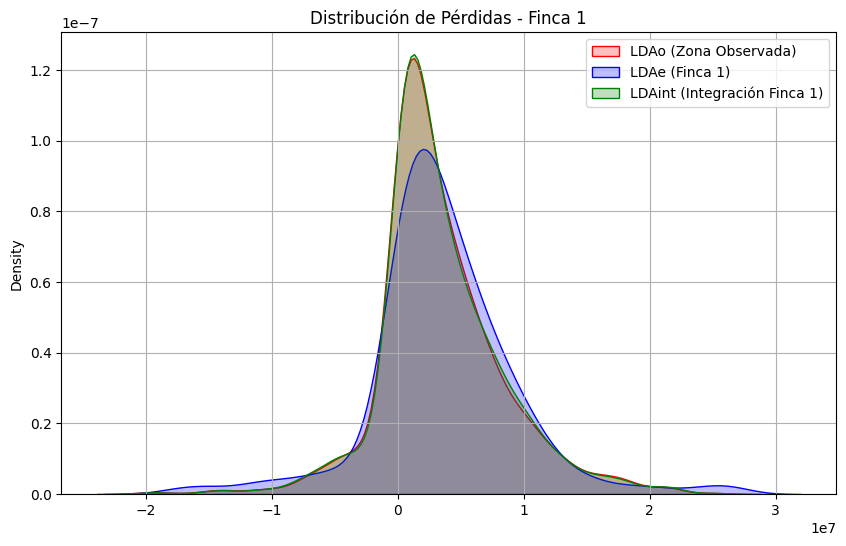


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max,asimetria,OpVar
Zona Obs,1000.0,3.389873e+06,4.971795e+06,-2.015284e+07,624715.803195,2.476325e+06,5.682661e+06,2.513954e+07,0.456191,1.833881e+07
Finca 1,235.0,3.648873e+06,5.724705e+06,-1.751341e+07,772228.285460,2.927232e+06,6.046484e+06,2.625595e+07,0.348014,2.333752e+07
Integrado 1,1072.0,3.421285e+06,4.971039e+06,-2.015284e+07,653456.294308,2.476325e+06,5.784874e+06,2.513954e+07,0.455743,1.846234e+07



PROCESANDO FINCA 2

Valores difusos para frecuencia (primer registro):


,Muy Pocos,Pocos,Más o Menos,Muchos,Bastantes
0,0.37109,0.352744,0.560528,0.951,0.98



Valores difusos para severidad (primer registro):


,Muy Bajo,Bajo,Medio,Alto,Muy Alto
0,0.525062,0.592197,0.892766,0.999967,0.914187



Número final de datos integrados: 55


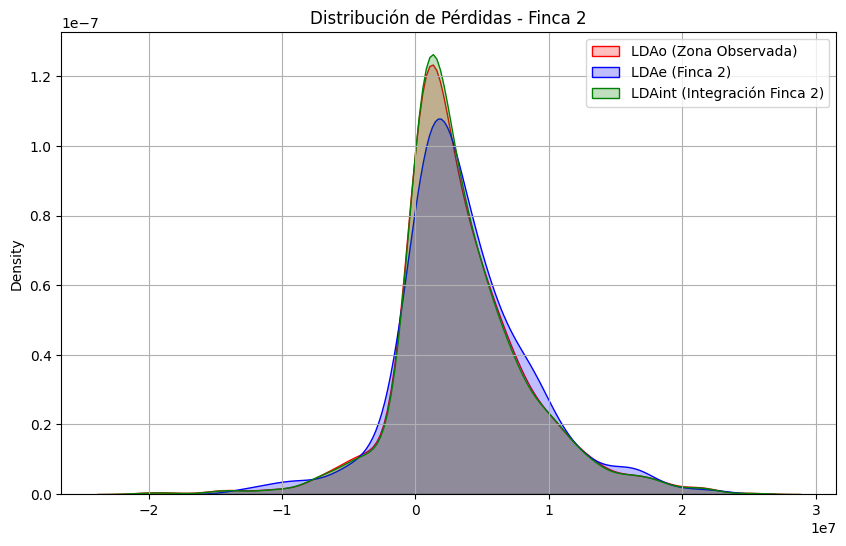


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max,asimetria,OpVar
Zona Obs,1000.0,3.389873e+06,4.971795e+06,-2.015284e+07,624715.803195,2.476325e+06,5.682661e+06,2.513954e+07,0.456191,1.833881e+07
Finca 2,235.0,3.632319e+06,4.906541e+06,-1.261729e+07,965650.779031,2.756978e+06,5.916430e+06,2.201084e+07,0.490024,1.673934e+07
Integrado 2,1055.0,3.377438e+06,4.913725e+06,-2.015284e+07,661566.639784,2.479974e+06,5.617985e+06,2.513954e+07,0.471500,1.818829e+07



PROCESANDO FINCA 3

Valores difusos para frecuencia (primer registro):


,Muy Pocos,Pocos,Más o Menos,Muchos,Bastantes
0,0.992167,0.90393,0.552498,0.312824,0.34218



Valores difusos para severidad (primer registro):


,Muy Bajo,Bajo,Medio,Alto,Muy Alto
0,0.514923,0.576063,0.879019,0.999339,0.921464



Número final de datos integrados: 55


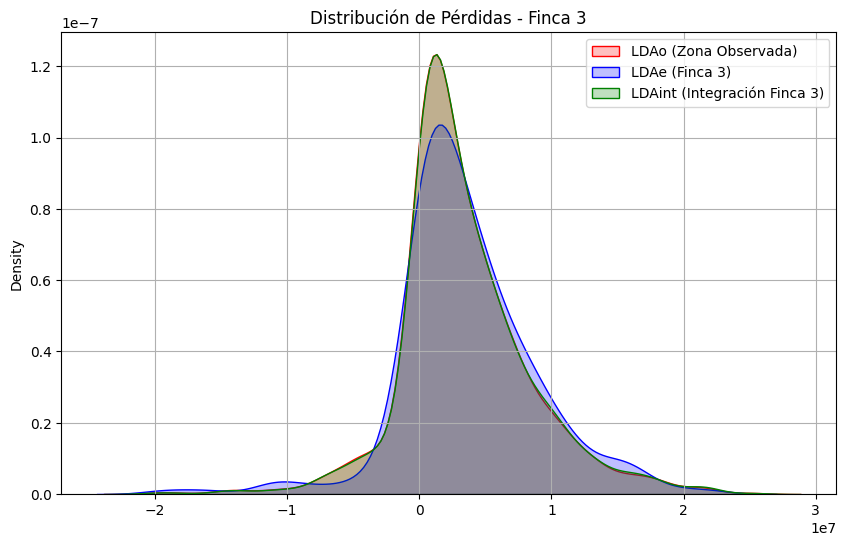


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max,asimetria,OpVar
Zona Obs,1000.0,3.389873e+06,4.971795e+06,-2.015284e+07,624715.803195,2.476325e+06,5.682661e+06,2.513954e+07,0.456191,1.833881e+07
Finca 3,235.0,3.617979e+06,5.209696e+06,-1.917631e+07,724538.054499,2.819920e+06,6.120545e+06,2.181272e+07,-0.056044,1.653036e+07
Integrado 3,1055.0,3.448725e+06,4.988714e+06,-2.015284e+07,662289.576646,2.511626e+06,5.775422e+06,2.513954e+07,0.489124,1.853735e+07



PROCESANDO FINCA 4

Valores difusos para frecuencia (primer registro):


,Muy Pocos,Pocos,Más o Menos,Muchos,Bastantes
0,0.989431,0.915807,0.573237,0.32694,0.352309



Valores difusos para severidad (primer registro):


,Muy Bajo,Bajo,Medio,Alto,Muy Alto
0,0.518915,0.58242,0.884518,0.999682,0.918628



Número final de datos integrados: 81


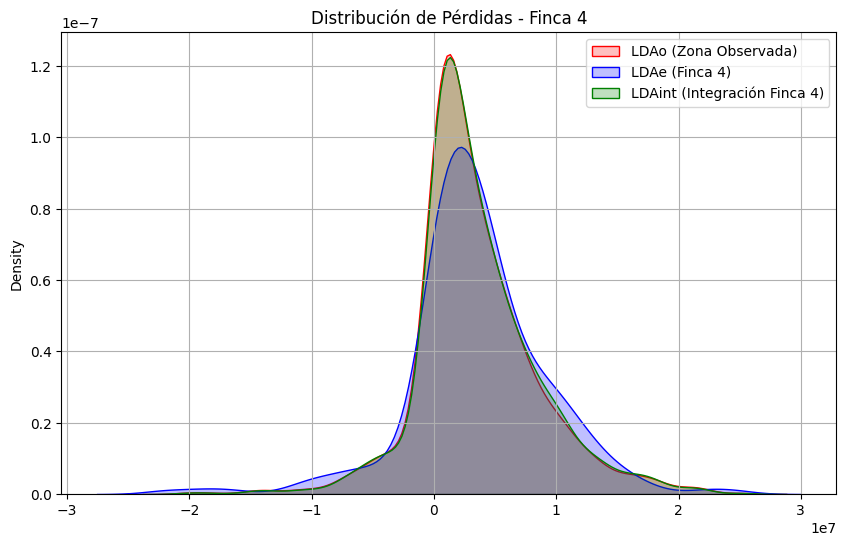


Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max,asimetria,OpVar
Zona Obs,1000.0,3.389873e+06,4.971795e+06,-2.015284e+07,624715.803195,2.476325e+06,5.682661e+06,2.513954e+07,0.456191,1.833881e+07
Finca 4,235.0,3.531558e+06,5.660343e+06,-2.190503e+07,774908.957995,3.085774e+06,6.190589e+06,2.432527e+07,-0.373578,1.708336e+07
Integrado 4,1081.0,3.491717e+06,4.963073e+06,-2.015284e+07,684278.731444,2.585586e+06,5.875838e+06,2.513954e+07,0.444120,1.811794e+07


In [ ]:
resultados = integrar_fincas(nxl_path, LDAo1, XCf, sigmaf, XCs, sigmas)

#**Analisis de resultados**

Se realizo al integración de las fincas con la zona observada a un nivel de integración del 99%. Para la integración con la finca 1 se observa que se integraron un total de 72 datos, dando en las estadisticas descriptivas valores muy similares en comparación con la observada y la integrada, lo que muestre que no hubo variación en la estructura de la distribución de las perdidas. Luego para la segunda integración, se integraron un total de 55 datos, en este al igual que en el pasado no hubo mucha variación de la estructura de la distribución de perdidas, relacionando las estadisticas descriptivas el integrado aumento un 2% la asimetria inclinandose un poco hacia la derecha lo que tiene una alta probabilidad de perdidas extremas, pero se redujo un poco el OpVar en comparación con la observada. Para la tercera integración, se integraron un total de 55 datos al igual que la segunda integración. Además, como se observa en las estadisticas descriptivas, la asimetria aumento un 3% lo que igualmente no hubo tanta variación y hubo cierto aumento en el OpVar lo que esta siguiendo el mismo patron de la segunda integración. Por ultimo, en la cuarta integración, esta fue la que mas datos integro con un total de 81. Además, en este hubo cierta disminución de la asimetria alrededor de un 1% y tambien reducción del Opvar, lo que tuvo una cierta inclinación hacia las perdidas que no son extremas.